In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, LSTM, Dense, Dropout, 
                                     BatchNormalization)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-10-12 10:38:37.898562: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-12 10:38:37.899226: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-12 10:38:37.976115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-12 10:38:40.584894: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

2025-10-11 23:23:35.166588: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-11 23:23:35.167046: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-11 23:23:35.236600: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-11 23:23:36.786287: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

--- Loading and Preprocessing Sequence Data ---
Final training data shape: (1200, 174, 25)

--- Step 3: Building the Hybrid CNN-LSTM Model ---


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-11 23:23:37.140302: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 174, 128)       │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,360 (1.79 MB)

 Trainable params: 467,592 (1.78 MB)

 Non-trainable params: 768 (3.00 KB)


--- Step 4: Training the Hybrid Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.2117 - loss: 1.9919 - val_accuracy: 0.2792 - val_loss: 1.9346 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.2933 - loss: 1.8462 - val_accuracy: 0.3708 - val_loss: 1.7496 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.3192 - loss: 1.7374 - val_accuracy: 0.3833 - val_loss: 1.6328 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.3875 - loss: 1.6127 - val_accuracy: 0.4125 - val_loss: 1.5685 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.4083 - loss: 1.5441 - val_accuracy: 0.3917 - val_loss: 1.6634 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.4392 - loss: 1.4823 - val_accuracy: 0.3917 - val_loss: 1.6264 - learning_rate: 5.0000e-04
Epoch 7/100
38/

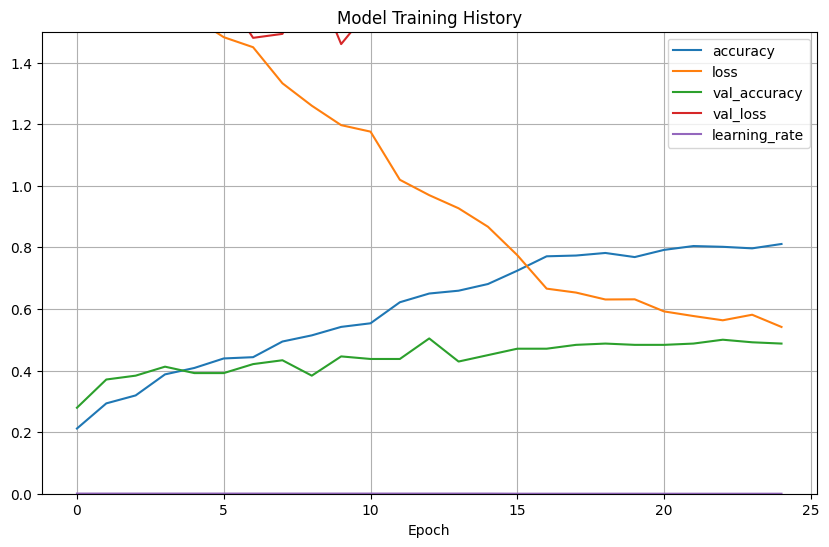


Test Accuracy (Hybrid CNN-LSTM Model): 44.58%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


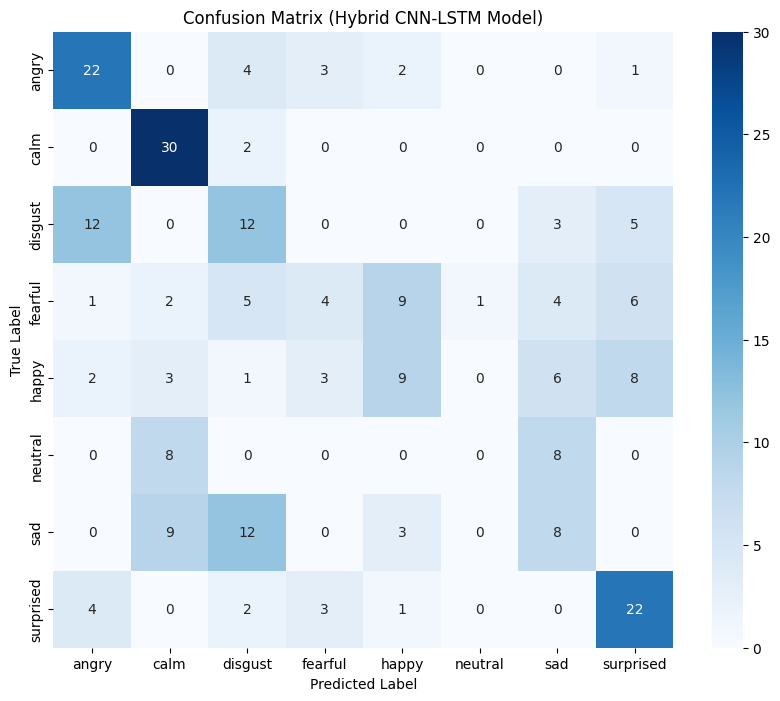


--- Step 6: Saving the Trained Model ---
Hybrid model saved to hybrid_cnn_lstm_model.h5


In [ ]:
# Baseline

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'hybrid_cnn_lstm_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the Hybrid CNN-LSTM Model ---")

def create_hybrid_model(input_shape, num_classes):
    model = Sequential()

    # --- CNN Front-End ---
    # find local, time-invariant patterns in the sequence.
    model.add(Conv1D(128, kernel_size=7, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(256, kernel_size=7, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # --- LSTM Back-End ---
    # understand the sequence of patterns extracted by the CNNs.
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    
    # --- Final Classifier Head ---
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = create_hybrid_model(input_shape, num_classes)
hybrid_model.summary()

print("\n--- Training the Hybrid Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = hybrid_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Hybrid Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = hybrid_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (Hybrid CNN-LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(hybrid_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Hybrid CNN-LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Saving the Trained Model ---")
hybrid_model.save(MODEL_SAVE_PATH)
print(f"Hybrid model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Final training data shape: (1200, 174, 27)

--- Building the Hybrid CNN-LSTM Model ---


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 174, 128)       │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 87, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,152 (1.79 MB)

 Trainable params: 469,384 (1.79 MB)

 Non-trainable params: 768 (3.00 KB)


--- Training the Hybrid Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.1792 - loss: 2.0394 - val_accuracy: 0.2417 - val_loss: 1.9847 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.2442 - loss: 1.9315 - val_accuracy: 0.3167 - val_loss: 1.9220 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.2817 - loss: 1.8512 - val_accuracy: 0.3542 - val_loss: 1.7881 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.3025 - loss: 1.7720 - val_accuracy: 0.3542 - val_loss: 1.7019 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.3458 - loss: 1.6798 - val_accuracy: 0.4542 - val_loss: 1.6139 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.4042 - loss: 1.5974 - val_accuracy: 0.4833 - val_loss: 1.4713 - learning_rate: 5.0000e-04
Epoch 7/100
38/38 ━━━━

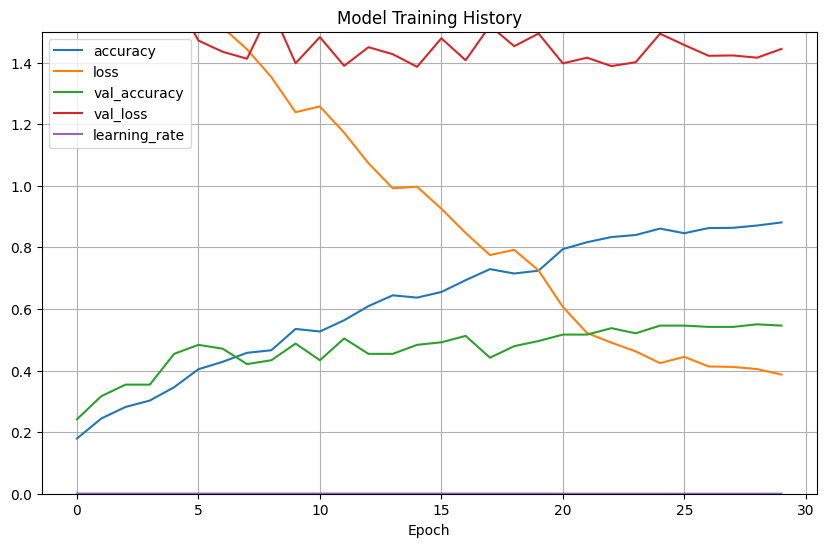


Test Accuracy (Hybrid CNN-LSTM Model): 48.33%


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


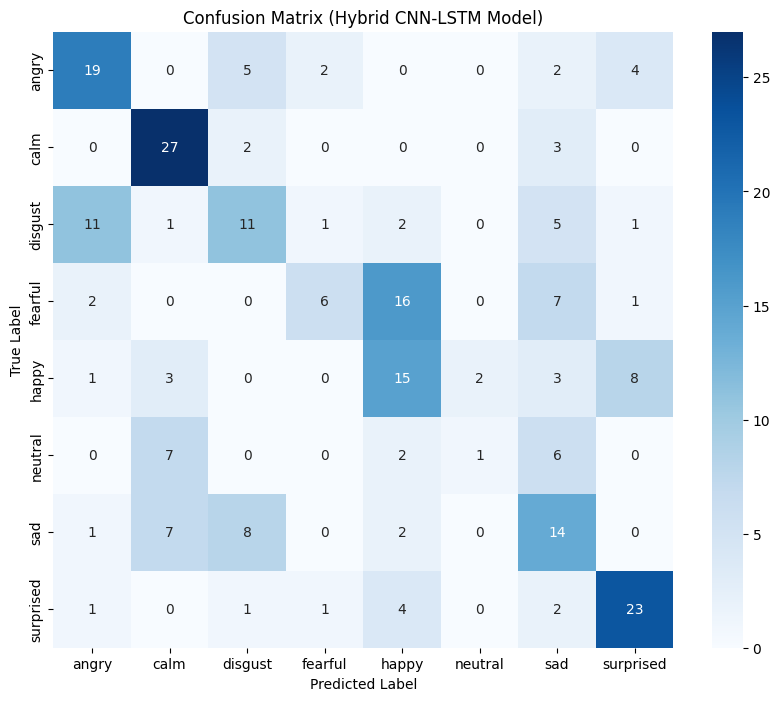


--- Saving the Trained Model ---
Hybrid model saved to hybrid_cnn_lstm_model.h5


In [5]:
# after augmentation + zcr + rms 

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'hybrid_cnn_lstm_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the Hybrid CNN-LSTM Model ---")

def create_hybrid_model(input_shape, num_classes):
    model = Sequential()

    # --- CNN Front-End ---
    # find local, time-invariant patterns in the sequence.
    model.add(Conv1D(128, kernel_size=7, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(256, kernel_size=7, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # --- LSTM Back-End ---
    # understand the sequence of patterns extracted by the CNNs.
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    
    # --- Final Classifier Head ---
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = create_hybrid_model(input_shape, num_classes)
hybrid_model.summary()

print("\n--- Training the Hybrid Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = hybrid_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Hybrid Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = hybrid_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (Hybrid CNN-LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(hybrid_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Hybrid CNN-LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Saving the Trained Model ---")
hybrid_model.save(MODEL_SAVE_PATH)
print(f"Hybrid model saved to {MODEL_SAVE_PATH}")

--- Loading and Preprocessing Sequence Data ---
Final training data shape: (1200, 174, 27)

--- Building the Hybrid CNN-LSTM Model ---


/home/manas/Desktop/ML_SpeechEmotion/speech_emotion_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 174, 128)       │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 174, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 87, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 87, 256)        │       229,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 87, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 43, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 470,152 (1.79 MB)

 Trainable params: 469,384 (1.79 MB)

 Non-trainable params: 768 (3.00 KB)


--- Training the Hybrid Model ---
Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.1908 - loss: 2.0452 - val_accuracy: 0.1792 - val_loss: 2.0001 - learning_rate: 5.0000e-04
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.2183 - loss: 1.9566 - val_accuracy: 0.2458 - val_loss: 1.9473 - learning_rate: 5.0000e-04
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.2717 - loss: 1.8843 - val_accuracy: 0.3792 - val_loss: 1.8294 - learning_rate: 5.0000e-04
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.3217 - loss: 1.7960 - val_accuracy: 0.3708 - val_loss: 1.7329 - learning_rate: 5.0000e-04
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.3467 - loss: 1.7131 - val_accuracy: 0.4083 - val_loss: 1.6166 - learning_rate: 5.0000e-04
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3883 - loss: 1.5874 - val_accuracy: 0.3833 - val_loss: 1.5082 - learning_rate: 5.0000e-04
Epoch 7/100
38/38 ━━━━

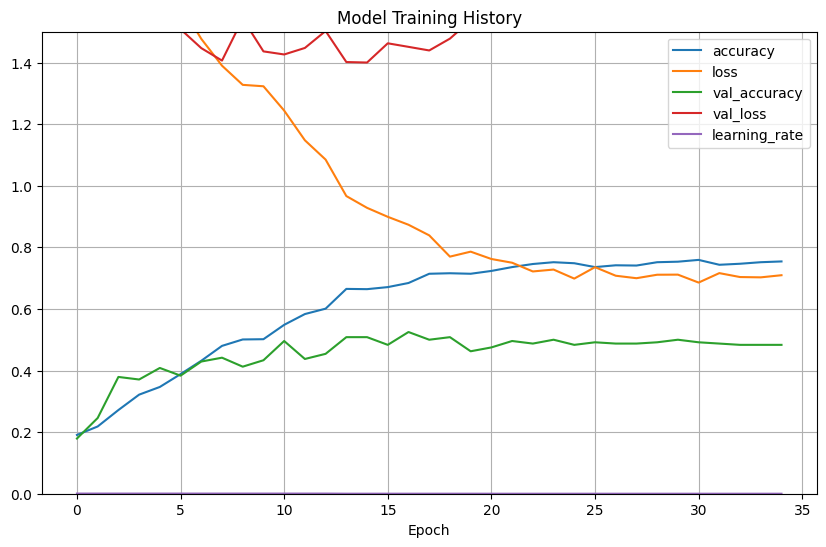


Test Accuracy (Hybrid CNN-LSTM Model): 50.83%
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


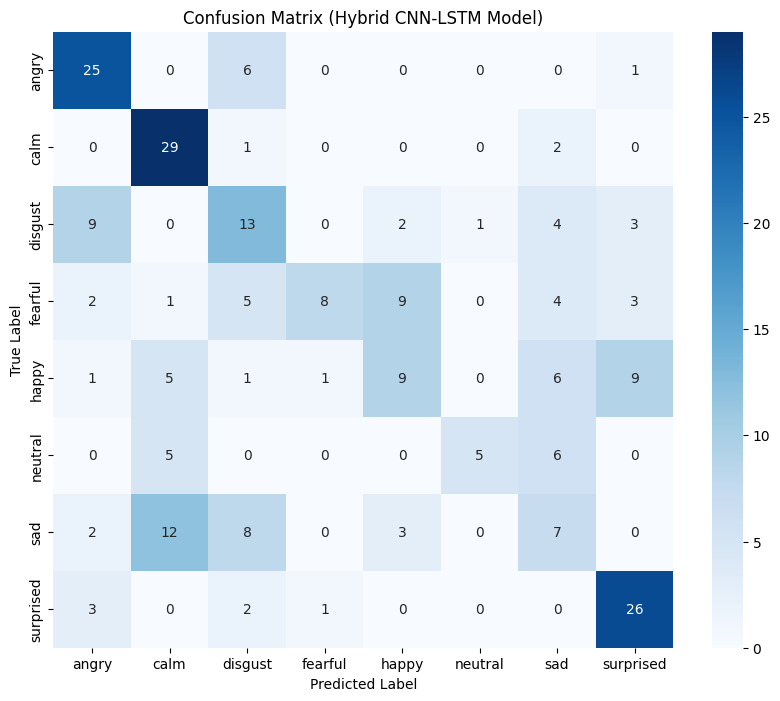


--- Saving the Trained Model ---
Hybrid model saved to hybrid_cnn_lstm_model.h5


In [6]:
# after augmentation + zcr + rms (increased patience)

SEQUENCE_PATH = 'sequences'
BATCH_SIZE = 32
EPOCHS = 100
MODEL_SAVE_PATH = 'hybrid_cnn_lstm_model.h5'

print("--- Loading and Preprocessing Sequence Data ---")
X_train = np.load(os.path.join(SEQUENCE_PATH, 'X_train_seq.npy'))
y_train = np.load(os.path.join(SEQUENCE_PATH, 'y_train_seq.npy'))
X_test = np.load(os.path.join(SEQUENCE_PATH, 'X_test_seq.npy'))
y_test = np.load(os.path.join(SEQUENCE_PATH, 'y_test_seq.npy'))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

le = LabelEncoder()
y_train_encoded = to_categorical(le.fit_transform(y_train))
y_test_encoded = to_categorical(le.transform(y_test))
class_names = le.classes_
num_classes = len(class_names)
print(f"Final training data shape: {X_train.shape}")

print("\n--- Building the Hybrid CNN-LSTM Model ---")

def create_hybrid_model(input_shape, num_classes):
    model = Sequential()

    # --- CNN Front-End ---
    # find local, time-invariant patterns in the sequence.
    model.add(Conv1D(128, kernel_size=7, activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(256, kernel_size=7, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.4))

    # --- LSTM Back-End ---
    # understand the sequence of patterns extracted by the CNNs.
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    
    # --- Final Classifier Head ---
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the model
input_shape = (X_train.shape[1], X_train.shape[2])
hybrid_model = create_hybrid_model(input_shape, num_classes)
hybrid_model.summary()

print("\n--- Training the Hybrid Model ---")

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = hybrid_model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

print("\n--- Evaluating the Hybrid Model ---")

# Plot training history
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.title("Model Training History")
plt.xlabel("Epoch")
plt.show()

# Evaluate on the test set
loss, accuracy = hybrid_model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy (Hybrid CNN-LSTM Model): {accuracy * 100:.2f}%")

# confusion matrix
y_pred = np.argmax(hybrid_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Hybrid CNN-LSTM Model)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n--- Saving the Trained Model ---")
hybrid_model.save(MODEL_SAVE_PATH)
print(f"Hybrid model saved to {MODEL_SAVE_PATH}")